# EN556 Status Meeting

#### *A summary of EN556 figures with the data processed so far*

## FLA bulk rates

In [26]:
#first some wrangling to read in the data and get the data in a format that will be pretty to plot
#load essential libraries
require(ggplot2)
require(RColorBrewer)
require(dplyr)

#read in data
maxes.bulk <- read.csv("FLA/FlaMaxRatesEN556_bulk.csv",row.names=1,colClasses=c("character","numeric","numeric",rep("factor",6)))
factors.bulk <- read.csv("FLA/FlaRatesWithFactorsEN556_bulk.csv",row.names=1,colClasses=c("character","numeric","numeric",rep("factor",6)))

#change d2 in depthid column for stn1-4 to d5 so will plot in same facet as stns5-8.
for (i in 1:4) {
    maxes.bulk[maxes.bulk$stn==i & maxes.bulk$depthid=="d2","depthid"] <- "d5"
}
for (i in 1:4) {
    factors.bulk[factors.bulk$stn==i & factors.bulk$depthid=="d2","depthid"] <- "d5"
}
#relabel stn column
maxes.bulk$stn <- gsub(x=maxes.bulk$stn, pattern="([0-9])",replacement="stn\\1")
factors.bulk$stn <- gsub(x=factors.bulk$stn, pattern="([0-9])",replacement="stn\\1")


#define color palette
substrateColors <- brewer.pal(n=6,name="Dark2")

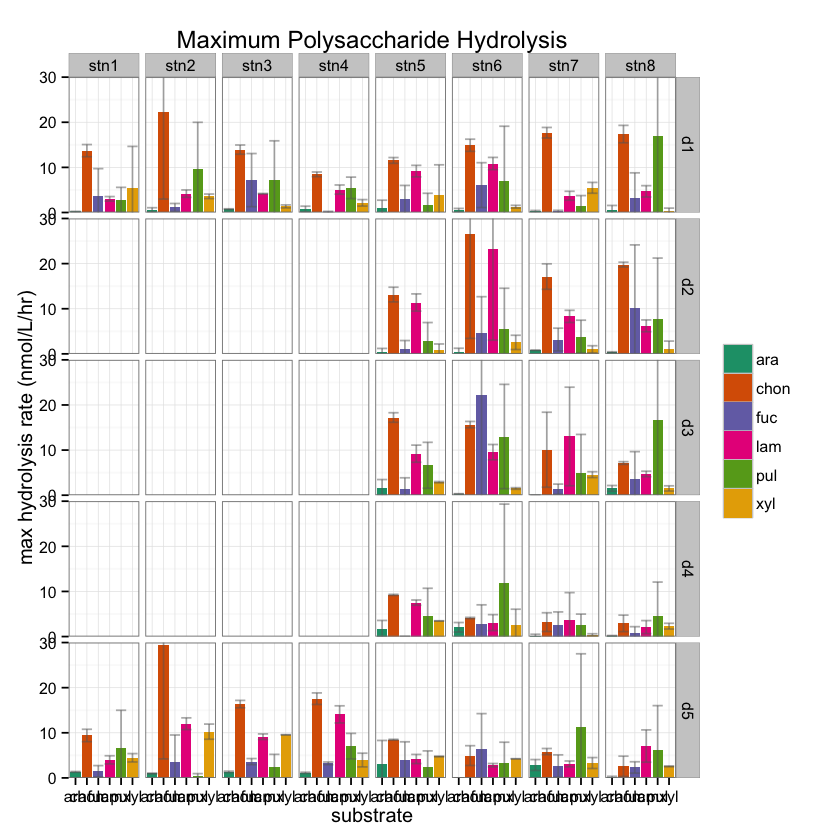

In [23]:
#summary plot of maximum hydrolysis rates
a <- ggplot(maxes.bulk,aes(x=substrate,y=mean.kcrate.nM.hr)) + geom_bar(aes(fill=substrate),stat="identity") + facet_grid(depthid~stn) 
b <- a + geom_errorbar(aes(ymin=mean.kcrate.nM.hr-sd.kcrate.nM.hr,ymax=mean.kcrate.nM.hr+sd.kcrate.nM.hr),color="grey40",alpha=0.5) 
c <- b + theme_bw() + theme(legend.title=element_blank()) + coord_cartesian(ylim=c(0,30)) + scale_fill_manual(name=substrate,values=substrateColors)
d <- c + labs(y="max hydrolysis rate (nmol/L/hr)",title="Maximum Polysaccharide Hydrolysis")
print(d)

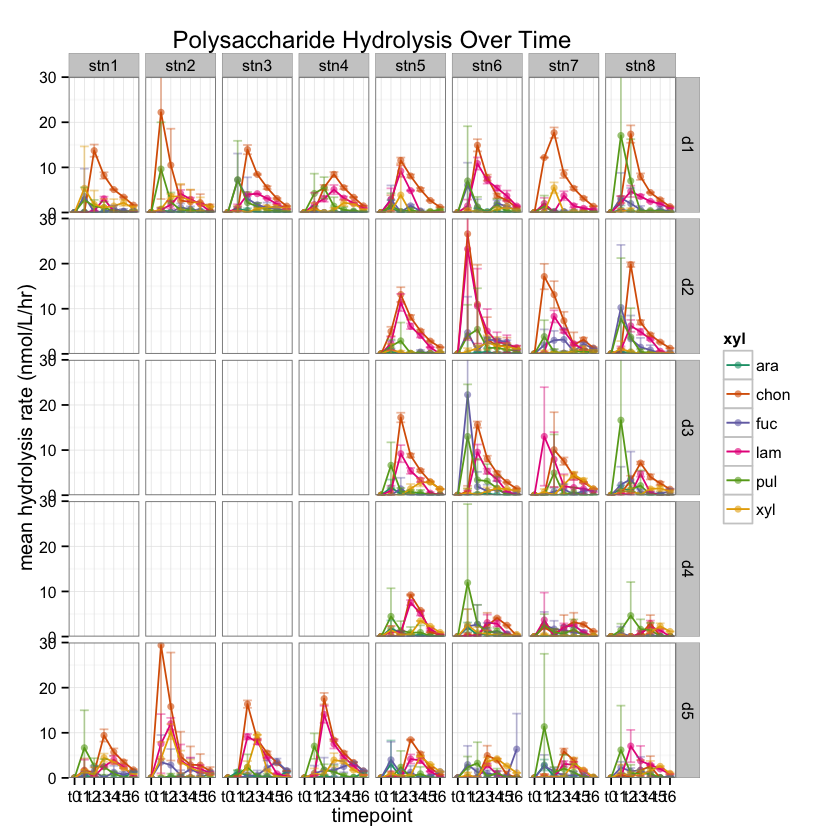

In [30]:
#timeplot

a <- ggplot(factors.bulk,aes(x=timepoint,y=mean.kcrate.nM.hr,group=substrate)) + geom_point(aes(color=substrate),size=2,alpha=0.6) 
b <- a + geom_line(aes(color=substrate)) + facet_grid(depthid~stn) + geom_errorbar(aes(ymin=mean.kcrate.nM.hr-sd.kcrate.nM.hr,ymax=mean.kcrate.nM.hr+sd.kcrate.nM.hr,color=substrate),alpha=0.4) 
c <- b + theme_bw() + coord_cartesian(ylim=c(0,30)) + labs(y="mean hydrolysis rate (nmol/L/hr)",title="Polysaccharide Hydrolysis Over Time")
d <- c + scale_color_manual(name=substrate,values=substrateColors)
print(d)

## Plate Reader bulk rates

In [13]:
##some data processing
bulk <- read.csv("PlateReader/plateMasterBulkWithFactors.csv",row.names=1,header=TRUE)

#define color palette
lmwColors <- brewer.pal(n=7,name="Set3")


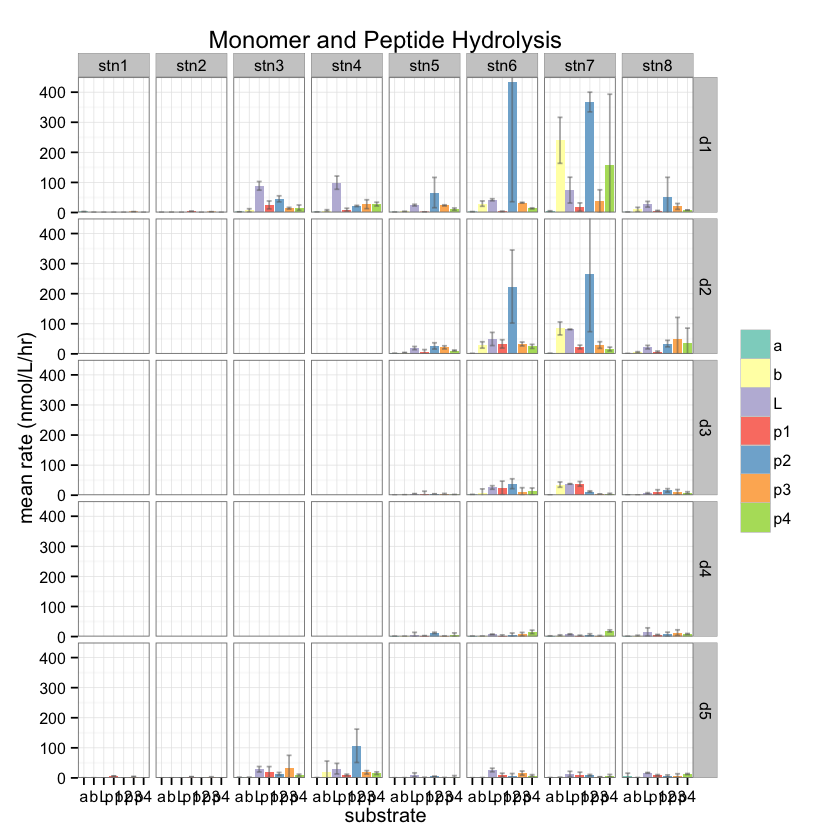

In [29]:
a <- ggplot(bulk,aes(x=substrate,y=mean)) + geom_bar(aes(fill=substrate),stat="identity") + facet_grid(depthid~stn) 
b <- a + geom_errorbar(aes(ymin=mean-sd,ymax=mean+sd),color="grey40",width=0.5,alpha=0.5) + scale_fill_manual(name=substrate,values=lmwColors)
c <- b + theme_bw() + theme(legend.title=element_blank()) + coord_cartesian(ylim=c(0,450)) + labs(y="mean rate (nmol/L/hr)",title="Monomer and Peptide Hydrolysis")
print(c)


some of those rates are really high, but look small relative to the giant rates in stn6 and 7 surface/DCM. Let's adjust the y-axis scale to look at some of the differences among the less gargantuan sites. 

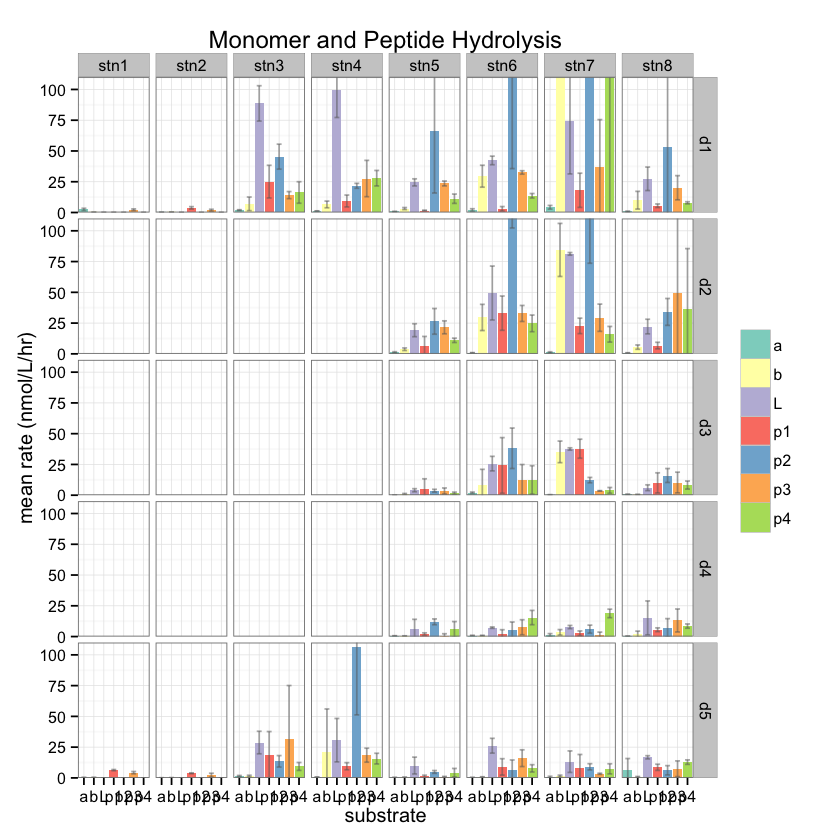

In [28]:
a <- ggplot(bulk,aes(x=substrate,y=mean)) + geom_bar(aes(fill=substrate),stat="identity") + facet_grid(depthid~stn) 
b <- a + geom_errorbar(aes(ymin=mean-sd,ymax=mean+sd),color="grey40",width=0.5,alpha=0.5) + scale_fill_manual(name=substrate,values=lmwColors)
c <- b + theme_bw() + theme(legend.title=element_blank()) + coord_cartesian(ylim=c(0,110)) + labs(y="mean rate (nmol/L/hr)",title="Monomer and Peptide Hydrolysis")
print(c)


# Gravity Filtration Results

## FLA  GF results

In [33]:
#get the data
maxes.gf <- read.csv("FLA/FlaMaxRatesEN556_gf.csv",row.names=1)
factors.gf <- read.csv("FLA/FlaRatesWithFactorsEN556_GF.csv",row.names=1)
#change stn4 d2 to d5 so will graph on same facet
maxes.gf[maxes.gf$stn=="stn4" & maxes.gf$depthid=="d2","depthid"] <- "d5"
factors.gf[factors.gf$stn=="stn4" & factors.gf$depthid=="d2","depthid"] <- "d5"

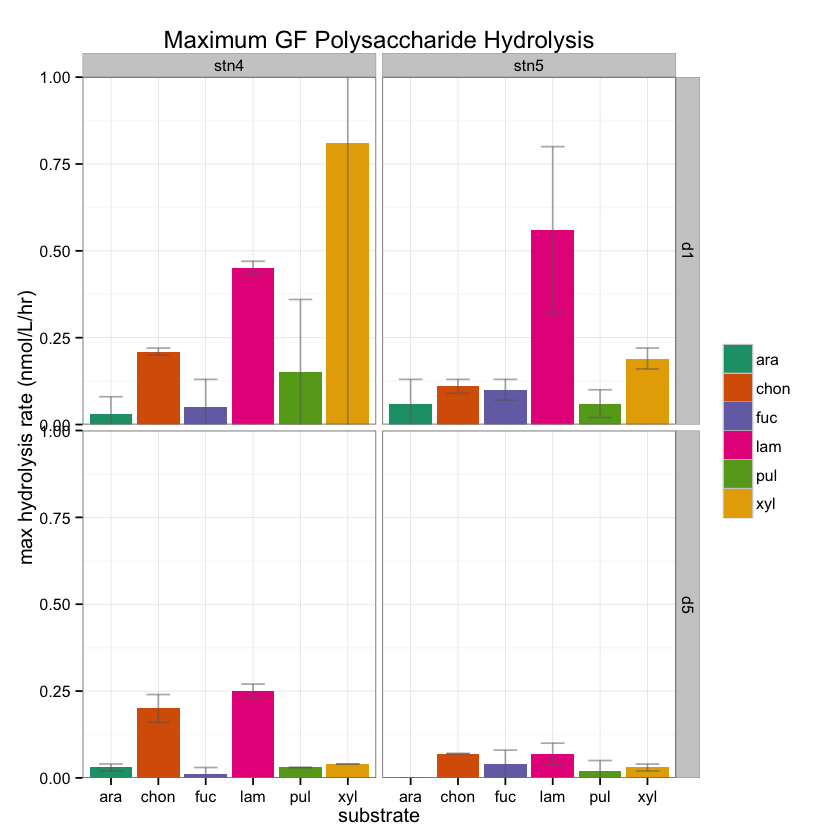

In [43]:
a <- ggplot(maxes.gf,aes(x=substrate,y=mean.kcrate.nM.hr)) + geom_bar(aes(fill=substrate),stat="identity") + facet_grid(depthid~stn) 
b <- a + geom_errorbar(aes(ymin=mean.kcrate.nM.hr-sd.kcrate.nM.hr,ymax=mean.kcrate.nM.hr+sd.kcrate.nM.hr),color="grey40",alpha=0.5,width=0.5) 
c <- b + theme_bw() + theme(legend.title=element_blank()) + scale_fill_manual(name=substrate,values=substrateColors)
d <- c + labs(y="max hydrolysis rate (nmol/L/hr)",title="Maximum GF Polysaccharide Hydrolysis") + coord_cartesian(ylim=c(0,1))
print(d)

these seem low, but keep in mind we're dividing by a much larger volume (between 350-1500mL) compared to the bulk rates (50mL), and when you look at the chromatograms from GF it looks like a lot of activity but doesn't go particularly fast. 

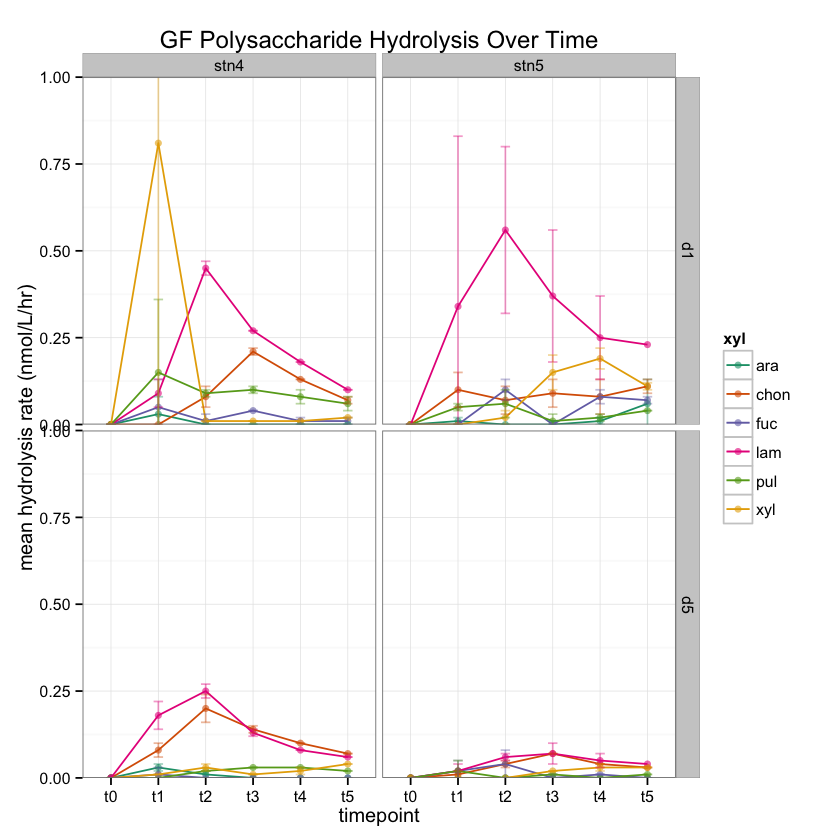

In [41]:
#timeplot

a <- ggplot(factors.gf,aes(x=timepoint,y=mean.kcrate.nM.hr,group=substrate)) + geom_point(aes(color=substrate),size=2,alpha=0.6) 
b <- a + geom_line(aes(color=substrate)) + facet_grid(depthid~stn) + theme_bw() + coord_cartesian(ylim=c(0,1)) + labs(y="mean hydrolysis rate (nmol/L/hr)",title="GF Polysaccharide Hydrolysis Over Time")
c <- b + geom_errorbar(aes(ymin=mean.kcrate.nM.hr-sd.kcrate.nM.hr,ymax=mean.kcrate.nM.hr+sd.kcrate.nM.hr,color=substrate),alpha=0.4,width=0.2) 
d <- c + scale_color_manual(name=substrate,values=substrateColors)
print(d)

It looks to me like peak activities were generally at later timepoints in GF than in the bulk experiments, which could also explain differences in rate magnitudes. 

## Plate Reader GF Results

In [45]:
#read in data
gf <- read.csv("PlateReader/plateMasterGFWithFactors.csv",row.names=1,header=TRUE)

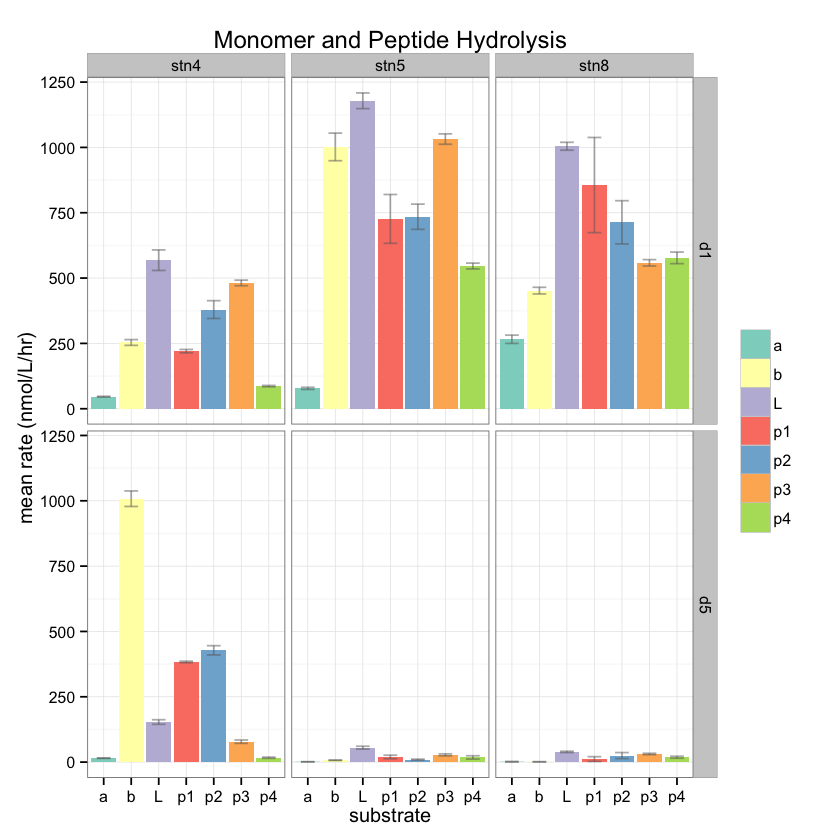

In [48]:
a <- ggplot(gf,aes(x=substrate,y=mean)) + geom_bar(aes(fill=substrate),stat="identity") + facet_grid(depthid~stn) 
b <- a + geom_errorbar(aes(ymin=mean-sd,ymax=mean+sd),color="grey40",width=0.5,alpha=0.5) + scale_fill_manual(name=substrate,values=lmwColors)
c <- b + theme_bw() + theme(legend.title=element_blank()) + labs(y="mean rate (nmol/L/hr)",title="Monomer and Peptide Hydrolysis")
print(c)

really interesting contrast to the polysaccharides in the LMW results. 

# Large Volume Results

## FLA LV Results